## Task 1: Exploratory Data Analysis (EDA)

In [1]:
# Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from scipy.stats import pointbiserialr
import warnings
#Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('bank.csv')

## Question
The aim of the bank data is to have customers subscribe to a term deposit. From the data we have been given what variables appear to have the best predictive value for successful or unsuccessful subscription? These variables should be ones that can easily and accurately be assesssed so that for future campaigns certain people can be specifically targeted.

## Part 1 - Initial Statistics

In [3]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


There are 2000 observations and from the above we can see that age is the only numerical variable with missing values, these will need to be filled in later on. From the above stats we see that the balance is heavily skewed as one might expect, this value can also be a negative indicating some people are in overdraft. The average age from the dataset is 41 years. 

In [5]:
df.info()  # To show the data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [6]:
# Creating a list of the categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
# Creating a value count for each categorical variable
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for job:
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


Value counts for marital:
married     1111
single       674
divorced     215
Name: marital, dtype: int64


Value counts for education:
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64


Value counts for default:
no     1985
yes      15
Name: default, dtype: int64


Value counts for housing:
no     1037
yes     963
Name: housing, dtype: int64


Value counts for loan:
no     1750
yes     250
Name: loan, dtype: int64


Value counts for contact:
cellular     1663
telephone     146
Name: contact, dtype: int64


Value counts for month:
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: i

In [7]:
# Check for missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [8]:
# Creating a frequency table for the housing variable
frequency_table = df['housing'].value_counts(ascending=True)
print('Frequency Table for Housing:') 
print(frequency_table)

Frequency Table for Housing:
yes     963
no     1037
Name: housing, dtype: int64


In [9]:
# The above can then be used to create a pivot table which shows the fraction of people
# who have housing loan who have subscribed.
pivot_table_1 = df.pivot_table(values='subscribed',
                                index='housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
# Print pivot table
print(pivot_table_1)

         subscribed
housing            
no         0.768563
yes        0.210800


In [10]:
# Doing the same again for loan and other variables below
frequency_table = df['loan'].value_counts(ascending=True)
pivot_table_2 = df.pivot_table(values='subscribed',
                                index='loan',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
# Print pivot table
print(pivot_table_2)

      subscribed
loan            
no      0.546857
yes     0.172000


In [11]:
frequency_table = df['contact'].value_counts(ascending=True)
pivot_table_3 = df.pivot_table(values='subscribed',
                                index='contact',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
print(pivot_table_3)

           subscribed
contact              
cellular     0.532171
telephone    0.623288


In [12]:
frequency_table = df['job'].value_counts(ascending=True)
pivot_table_4 = df.pivot_table(values='subscribed',
                                index='job',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
print(pivot_table_4)

               subscribed
job                      
admin.           0.526316
blue-collar      0.258389
entrepreneur     0.333333
housemaid        0.571429
management       0.544469
retired          0.839506
self-employed    0.546875
services         0.303030
student          0.906250
technician       0.413793
unemployed       0.695652


In [13]:
frequency_table = df['default'].value_counts(ascending=True)
pivot_table_4 = df.pivot_table(values='subscribed',
                                index='default',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
print(pivot_table_4)

         subscribed
default            
no         0.503275
yes        0.066667


### Part 1 - Conclusion
Above I have calculated some initial statistics for the dataset. I checked the number of missing values for each variable and we can see there is 5 such cases, these will have to be dealt with later. From the numerical statistics we can see 'age' and 'days' have relatively similar means and medians so we can expect to see relatively symmetric distributions. On the other hand, balance has a much higher mean than median. I would expect there to be outliers in this variable, so this is not surprising. I would also expect to see skewed distribution for the duration. I also created a value count for the categorical data. This provided some interesting insights, there is an extremely low number of people in default as well as a small number of people contacted by cellular. There is also a lot of possible values for job which may make it more difficult to analyse. I used these initial statistics to inform my focus for my question starting with the pivot tables. I could immediately see that ‘housing’ and ‘loan’ significantly impacted the likelihood of subscription. As expected those in ‘default’ were very unlikely to subscribe but this may not be the best variable to focus on due to the very low number in default. I also saw some variation with the job type, however as previously mention the large number of possible options does makes this harder to analyse.

## Part 2 - Plotting

In [14]:
# Creating a copy of the dataframe
df1 = df.copy()
# Converting subscribed to binary
df1['subscribed'] = df1['subscribed'].map({'yes': 1, 'no': 0})

Here I create an copy of the data frame with one slight adjustment. I have converted the yes/no outcome from the subscribed column to binary. This allows me to analyse the correlation between the other numeric columns and 'subscribed' which is very valuable in relation to my question. The default correlation is Pearson’s correlation but one of the requirements for this is that the variables be normally distributed. This will not be suitable here as the subscribed column is not normally distributed. The Point-Biserial correlation measures the correlation between a binary (Subscribed in our case) and continuous variable so I have used this here.

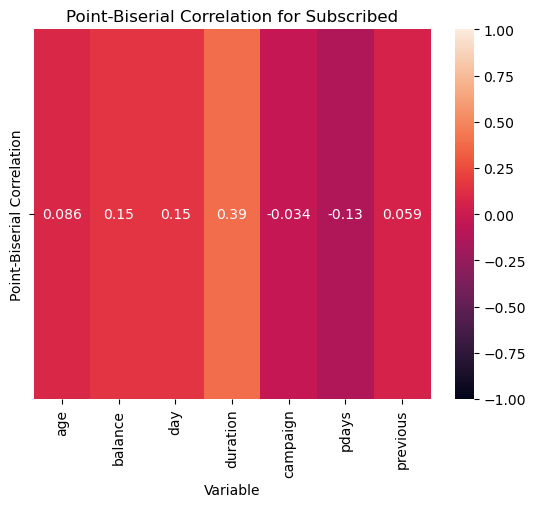

In [15]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# create an empty dictionary
result = {}

# Iterate over the numerical columns
for column in numerical_cols:
    df2 = df1.dropna(subset=[column])
    
    # Calculate the Point-Biserial correlation
    corr, p_value = pointbiserialr(df2['subscribed'], df2[column])
    # Store the correlation in the dictionary created above
    result[column] = corr

# Convert the results dictionary to a DataFrame
correlation_df = pd.DataFrame(list(result.items()), columns=['Variable', 'Point-Biserial Correlation'])
corr_1 = correlation_df.set_index('Variable').T

# Display the results
sns.heatmap(corr_1, annot = True, vmin = -1, vmax = 1)
plt.title('Point-Biserial Correlation for Subscribed');

The above heatmap displays the result of the correlation calculations. Duration clearly has the highest correlation although this cannot be used as a predictive value as it is not known before a call takes place. Apart from duration there is no other variable that has any meaningful correlation with subscribed.

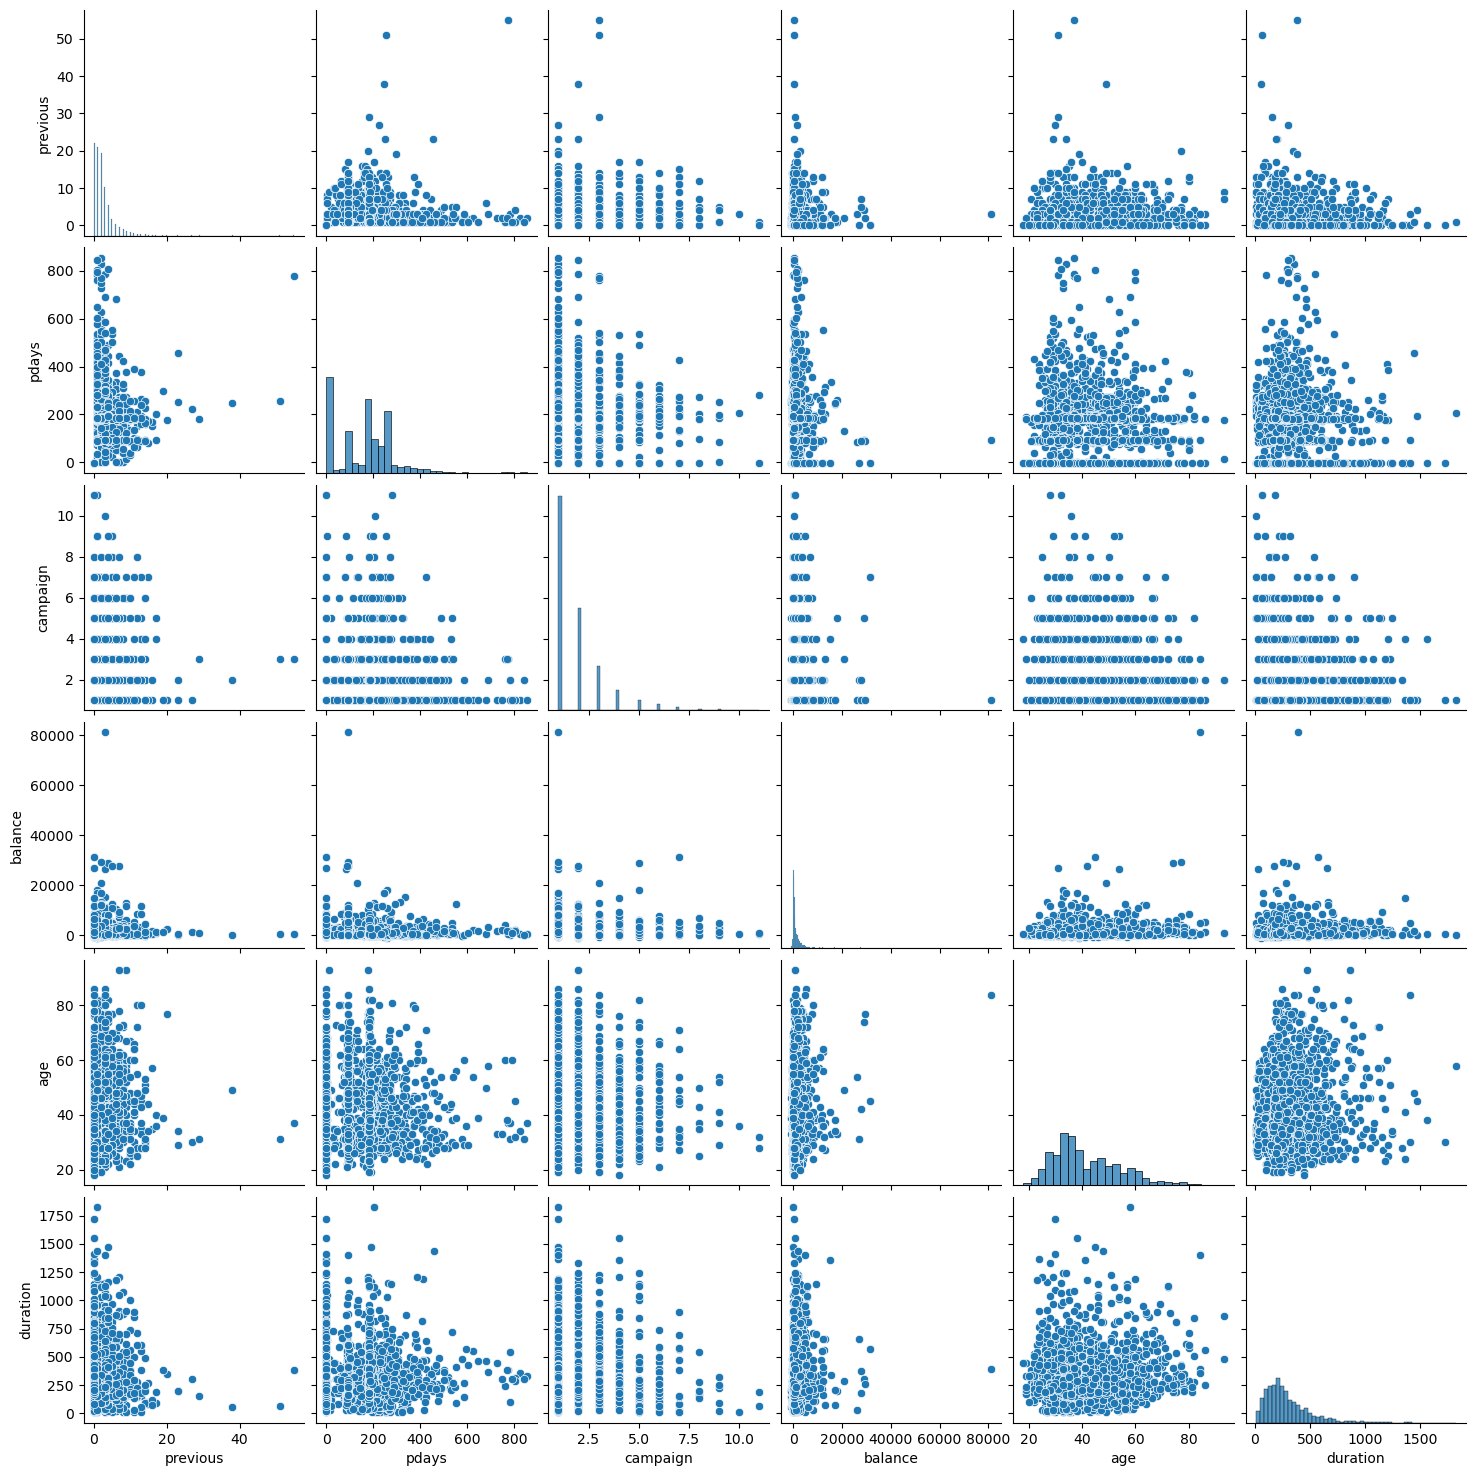

In [16]:
# Create a pairplot 
sns.pairplot(data=df[['previous','pdays','campaign','balance', 'age', 'duration']].dropna())
plt.show()

I created a pairplot above to quickly analyse the relationships each of the numeric variables although its not directly related to the question. The plots appear to have a lot of randomness and there is no clear linear relationship to be seen between the variables.

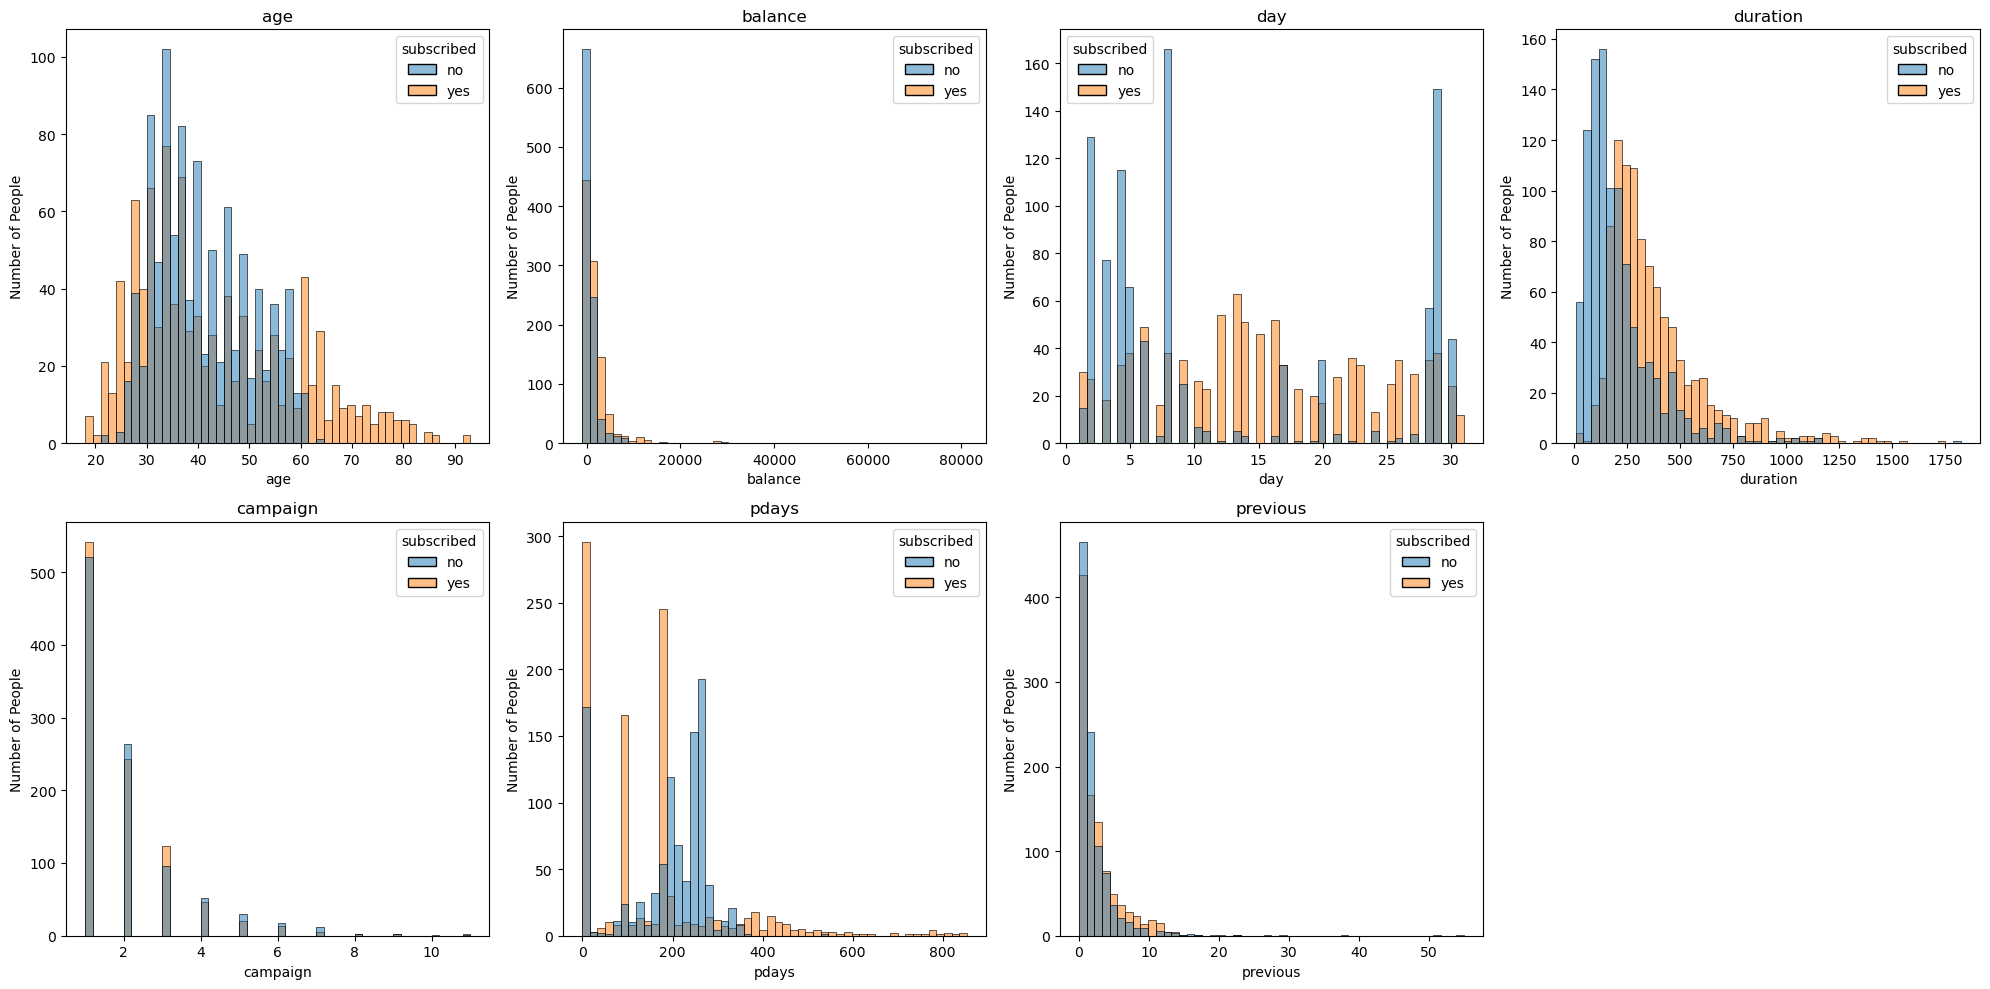

In [17]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# Create the figure and subplots
fig, x = plt.subplots(2, 4, figsize=(20, 10))  

# Flatten the array so we can easily iterate over it
x = x.flatten()
for i, col in enumerate(numerical_cols):
    # Using seaborn to create a histogram with a hue
    sns.histplot(data=df, x=col, hue='subscribed', ax=x[i], bins=50)
    x[i].set_title(col)  # Set title to the column name
    x[i].set_xlabel(col)  # Set xlabel
    x[i].set_ylabel('Number of People')  # Set ylabel

# hides the unused subplot
x[-1].set_visible(False)

plt.tight_layout()
plt.show()

The histograms above give us a good indication of the distribution of each of the variables. Age and duration are the closest to a normal distribution with both still being skewed. The day data appears to be completely random. The balance, campaign and previous data are all heavily right skewed indicating that the majority of cases for each are close to zero with outliers present as the values increase. I added the hue to see if the distribution differs for those who have subcribed. Duration gives a clear pattern where we can see an increased duration leads to more subscriptions. Interestingly there also appears to be more subscriptions in the older and younger age groups with a higher concentration of 'no' in the middle.

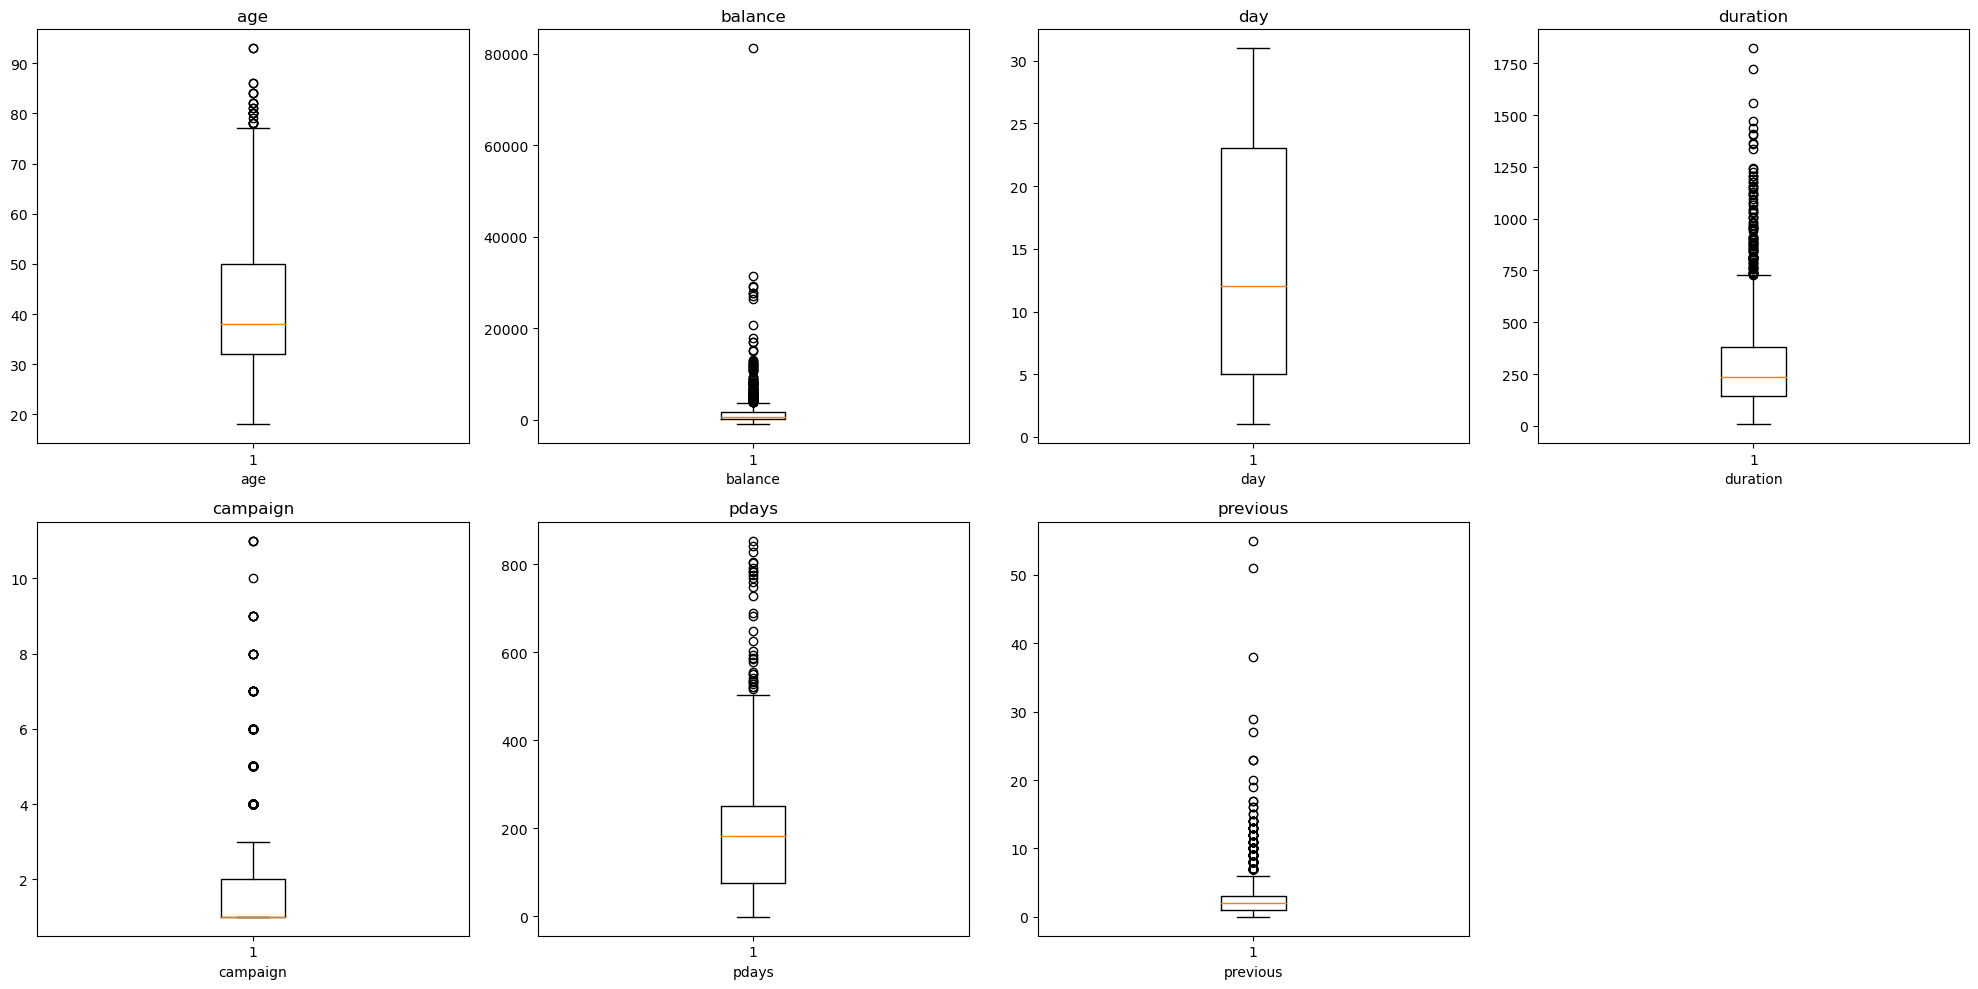

In [18]:
# In the same way as above I create boxplots for the numerical columns
fig, x = plt.subplots(2, 4, figsize=(20, 10))

x = x.flatten()

for i, col in enumerate(numerical_cols):
    x[i].boxplot(df[col].dropna())  
    x[i].set_title(col)  
    x[i].set_xlabel(col)
plt.tight_layout()

x[-1].set_visible(False)
plt.show()     

Above I analysed each of the numerical variables with boxplots. Again this is not related to the question but will be useful later on when preparing the dataset. We see there are a significant amount of outliers present in the data. The only set that has no outliers is the 'day' data. These outliers will have to be considered later on when preparing the data. The IQR for the balance data is extremely tight with a number of large upper outliers, this is to be expected with this variable. The age data is well distributed with a slight skew and campaign and previous are concentrated close to zero with a number of outliers for the larger observations.

## Part 2 - Conclusion
Seeing as the question I am trying to answer relates to a binary outcome I decided to create a separate data frame with the subscribed column converted to 0/1 depending on the outcome. This allowed me to graph the correlation matrix and include the subscribed data. We saw that duration is the most highly correlated variable with describe. However, as discussed above this cannot be used as a predictive measure. The duration would also be expected to be directly influenced by the outcome, if successful you would assume an individual had spent longer on the call in general. There was no significant correlation with the remaining variables. . I plotted histograms of each of the numerical variables with a hue added for subscribed column. Interestingly older and younger age groups appeared more likely to subscribe. I also examined box plots of the numerical data which will be useful in the data preparation later on.

## Part 3 - Combined Distribution Plotting

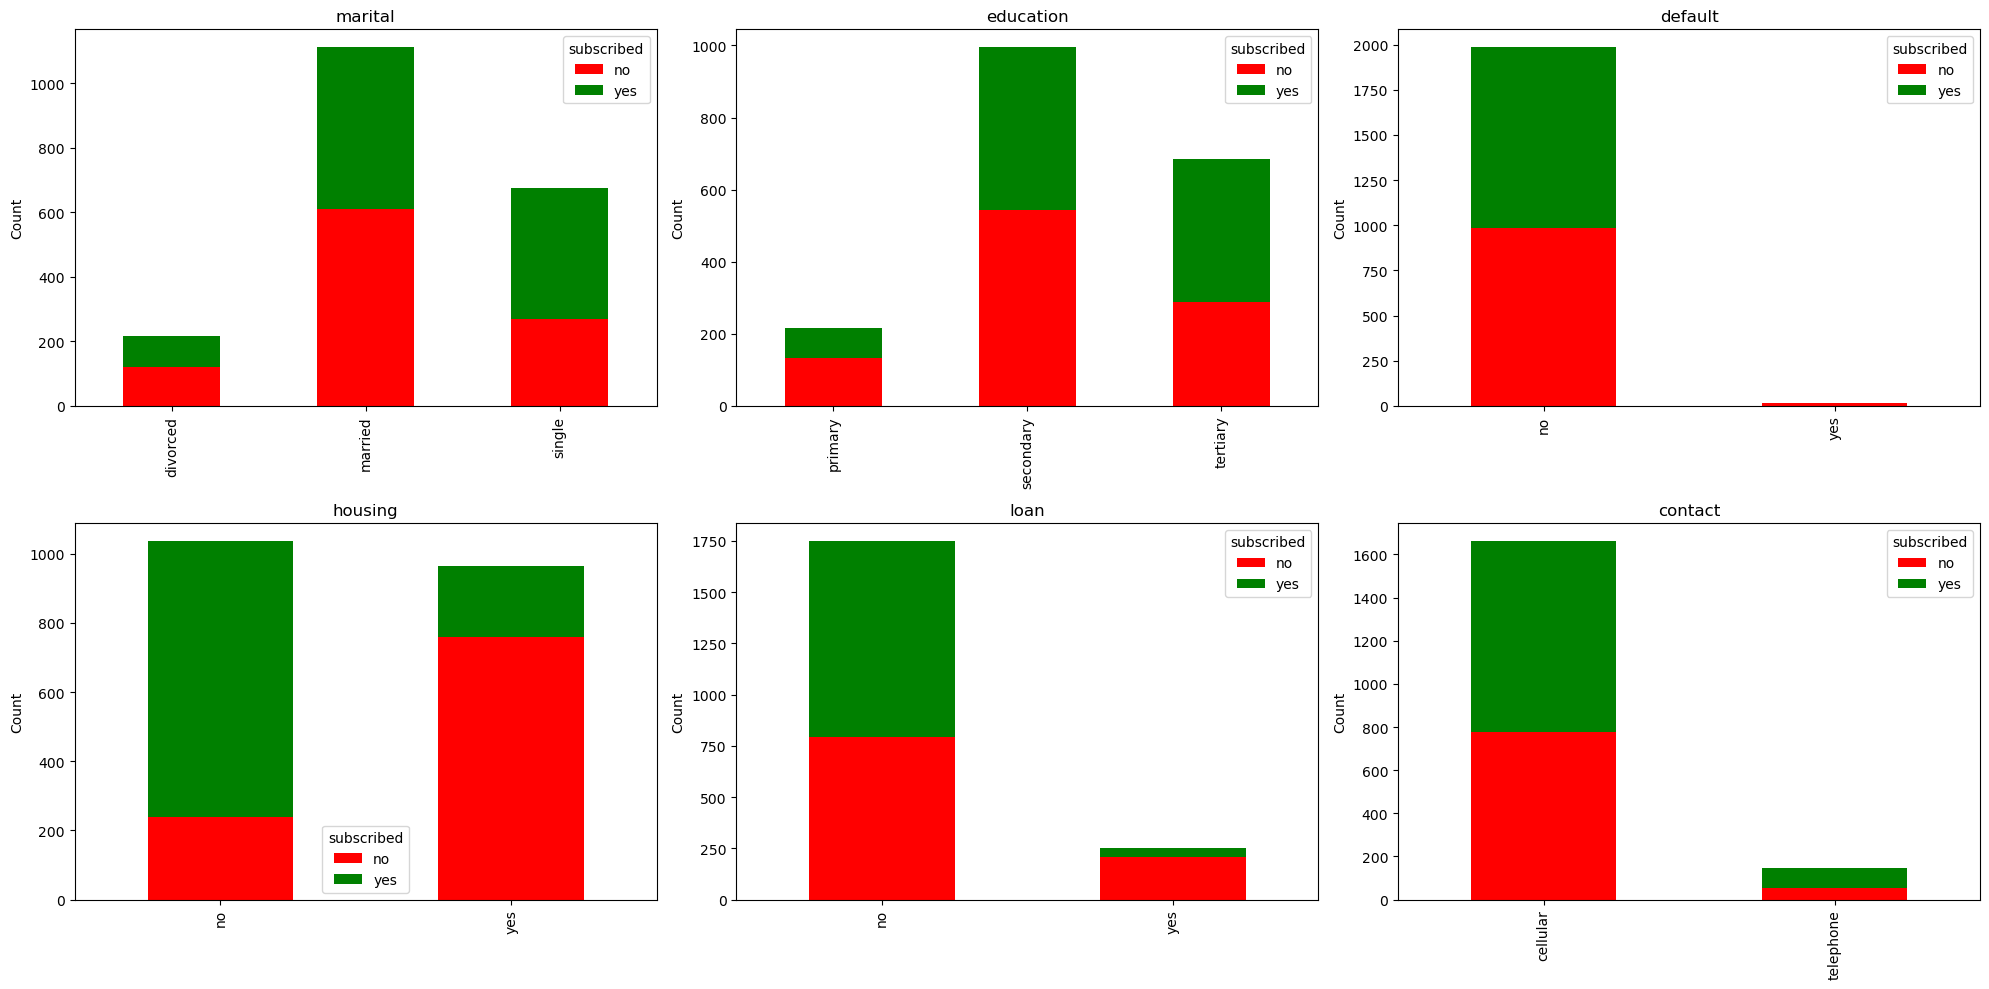

In [19]:
# Again as above I create stacked bar charts in the one subplot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs = axs.flatten()
# Categorical variables to be used (excluding job due to the large number of outcomes)
categorical_2 = ['marital','education','default','housing', 'loan', 'contact']

for i, col in enumerate(categorical_2):
    crosstab_CL = pd.crosstab(df[col], df['subscribed'])
    crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
    crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Count')
    plt.close()
plt.tight_layout()
plt.show()  

Above I have created stacked bar charts for the categorical data with 2 or 3 variables. This allowed me to visualise what was seen in the pivot tables I created for my initial statistics. As was seen previously there are very few who were in default who have subscribed but for those who are not in default this does not seem to have any predictive value. Education level could be seen to have some variation with more 'no' for primary with the balance shifting as this increases to 'tertiary'. What is clear from these is that either type of loan appears to have a noticeable impact on the likelihood of someone to subscribe.

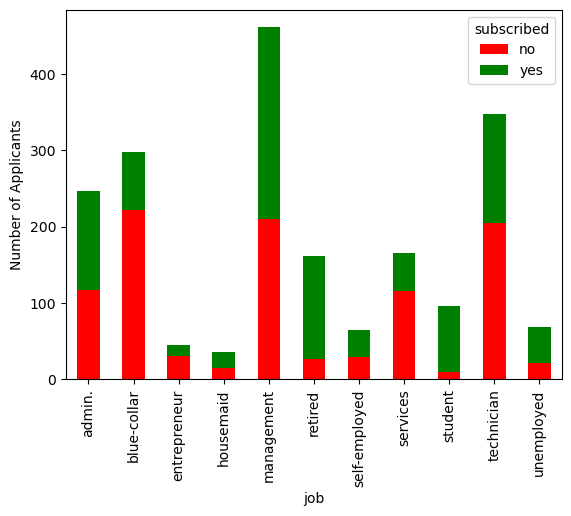

In [20]:
# Creating this separately for job
crosstab_CL = pd.crosstab(df['job'], df['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of Applicants')
plt.show()

I have done the same here for job seperately, due to the large amount of variables. We can see that students, retirees and the unemplyed are far more likely to subscribe than others. Blue-collar, services and entrepreneurs are far less likely to subscribe based on the above.

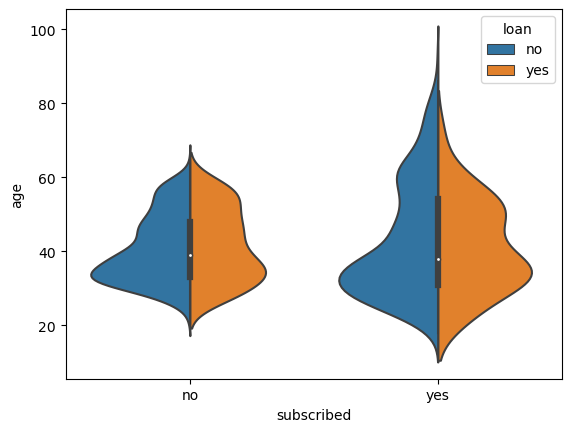

In [21]:
# Creating a violin plot for subscribed and age with loan as a hue
sns.violinplot(data=df, x='subscribed', y='age', hue='loan', split=True)
plt.show()

Here we can see the distribution of different ages on subscription split out by whether or not they have a loan. The median age for both subscribed and non subscribed is relatively similar. Those who have subscribed have a more spread out distribution regardless of whether they have a loan or not. This is also evident by a much more spread out IQR in the yes plot. Those wothout a loan have a large concentration of middle aged people as is seen by the wider sections concentrated towards the centre.  

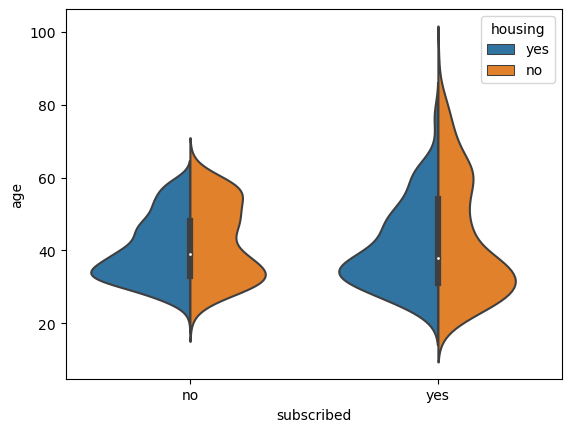

In [22]:
# Creating a violin plot for subscribed and age with housing as a hue
sns.violinplot(data=df, x='subscribed', y='age', hue='housing', split=True)
plt.show()

The distribution above substituting housing for loan from the first violin plot shows very similar distributions.

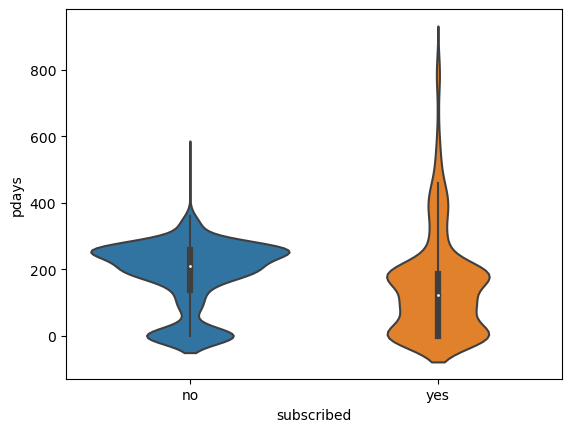

In [23]:
# Creating a violin plot for subscribed and pdays
sns.violinplot(data=df, x='subscribed', y='pdays')
plt.show()

The above violin plot compares the distribution of the number of days past since the last contact among those who have subscribed and those who have not. For both groups we see that a lot of individuals have been contacted recently. There are far more outliers present in the yes data which could indicate some successful subscriptions after long periods of no contact. Overall the violin plots provide a good indication of the distribution of the data but we would need to perform further analysis to determine if there is any significance behind what we are seeing.

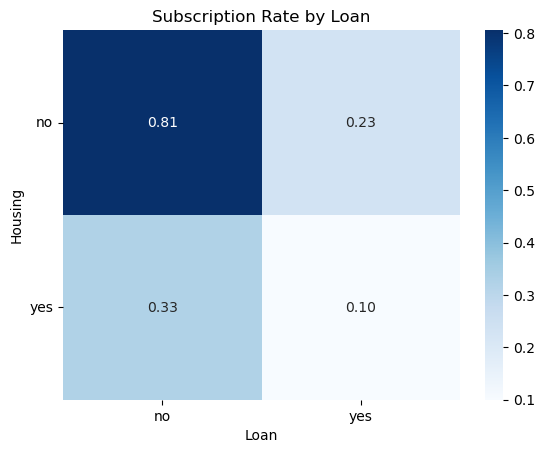

In [24]:
# Creating a pivot table
pivot_table = df.pivot_table(values='subscribed',
                                index='loan', columns = 'housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 
# Generate a heatmap using seaborn
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

# Setting the titles and labels
plt.title('Subscription Rate by Loan')
plt.xlabel('Loan')
plt.ylabel('Housing')
plt.yticks(rotation=0);

Following on from the conclusion of the stacked bar chart I decided to create the above graph combining the subscribed results of housing and loan. The above shows that the presence of just one type of loan has the potential to be a good predictor for an individual not subscribing. When both are yes the amount that subscribed is only at 10% and when both are no it is at 81%. These two variables appeared to be good predictors alone but we can see the added benefit when they are combined above.  

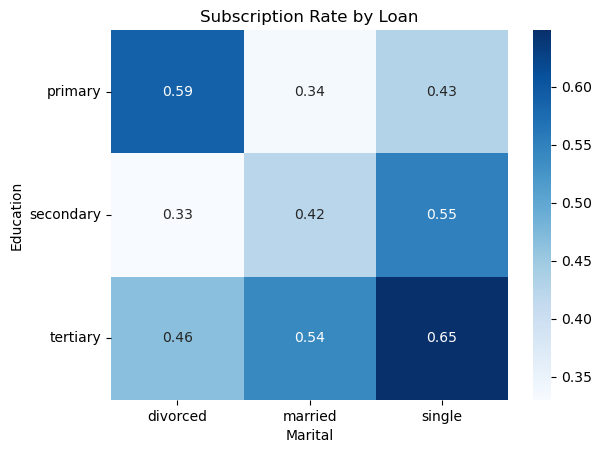

In [25]:
# Repeating the above with different variables
pivot_table = df.pivot_table(values='subscribed',
                                index='education', columns = 'marital',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt=".2f")

plt.title('Subscription Rate by Loan')
plt.xlabel('Marital')
plt.ylabel('Education')
plt.yticks(rotation=0);

As there was some variation in the stacked bar charts for education and marital status I decided to also combine these and analyse the results. Tertiary appears to have a higher level of subscriptions but interestingly the 'primary/divorced' segment is the second highest overall. While there are some insights here there is nothing as clear cut as what we saw in the previous plot.

## Part 3 - Conclusion 
Overall the above graphs produced give us a good insight into the data. The stacked bar charts are very informative. While there a are several categorical sets of data that can give us a better idea of if someone is to subscribe or not, I think the most useful here is the loan and housing data. Both are binary yes/no options and as we could see from the stacked bar chart this gives a very good indication of if someone will subscribe or not. When these two are combined in the pivot table we see this again to a greater extent. In creating the graphed pivot tables I aimed to find two variables that together give a greater indication of the likelihood of someone to subscribe. While job does appear to have some variation in subscription rates some of the observations have a small total and also the fact that there are 11 possible outcomes complicates this further. Focusing on the marital/education and the housing/loan which I hypothesised could give good predictions it’s clear that the housing/loan would be a better predictor. These two variables could be combined later on to form a new feature. I also created some violin plots and while these were useful in getting a better picture of the distributions none of these gave any clear evidence that would help to answer the question. <br>

Overall to answer my question I believe that the 'loan' and 'housing' variables are two good predictors that can be easily and accurately assessed. From the graphs and analysis there are some other areas that could provide some predictive value, we could see from the histogram that more young and old people tend to subscribe but further analysis would have to be done here. The 'housing' and 'loan' data is available for all individuals with no missing values and can also be easily combined together to give what looks to be a strong idea of if an individual will subscribe or not.

## Task 2 - Data Preperation

In [26]:
df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [27]:
# Check for missing values
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

From the above we can see there are missing values in age, job, education, contact and poutcome.

In [28]:
# Make a copy of the dataset
df_original = df

## New Feature
After the EDA I have decided to create a new feature that wil combine the loan and housing columns to better able to predict if an individual will subscribe without having to look at both of these variables seperately. I am deciding to add the new feature at this point so it is done before the one hot encoding which would complicate this process. We saw from the combined pivot table how stong an indicator this feature could be particularly when both results are yes or no. By combining these features I am aiming to create a stronger predictive feature to aid in predicting if an individual will subcribe or now.

In [29]:
# Conditions for the new column
conditions = [
    (df['housing'] == 'no') & (df['loan'] == 'no'),  # Neither
    (df['housing'] == 'yes') & (df['loan'] == 'no'), # Housing only
    (df['housing'] == 'no') & (df['loan'] == 'yes'), # Loan only
    (df['housing'] == 'yes') & (df['loan'] == 'yes') # Both
]

# Corresponding values for each condition
values = ['none', 'housing', 'personal', 'both']
df['loans_combined'] = np.select(conditions, values)
# Drop the 2 orginal columns 
df = df.drop(['loan', 'housing'], axis=1)
df.head(5)

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,loans_combined
0,32.0,technician,single,tertiary,no,392,cellular,1,apr,957,2,131,2,failure,no,housing
1,39.0,technician,divorced,secondary,no,688,cellular,1,apr,233,2,133,1,failure,no,both
2,59.0,retired,married,secondary,no,1035,cellular,1,apr,126,2,239,1,failure,no,both
3,47.0,blue-collar,married,secondary,no,398,cellular,1,apr,274,1,238,2,failure,no,both
4,54.0,retired,married,secondary,no,1004,cellular,1,apr,479,1,307,1,failure,no,housing


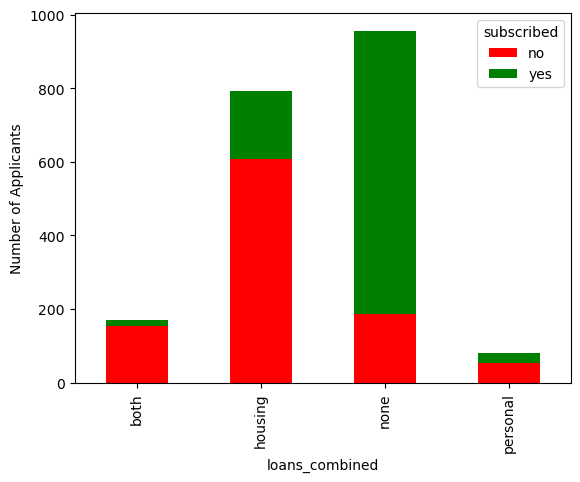

In [30]:
# creating a stacked bar chart with the new column
crosstab_CL = pd.crosstab(df_original['loans_combined'], df_original['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of Applicants')
plt.show()

We can see from the stacked bar chart how useful this feature is due especially because of the strong predictive value that 'both' and 'none' give.

In [31]:
# Education is ordinal, below I map each value to its numerical value

mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3,
}
# Replace the old values with the new ordinal values
df['education'] = df['education'].replace(mapper)

df.tail()

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,loans_combined
1995,20.0,student,single,NaN,no,2785,cellular,16,sep,327,2,-1,0,NaN,yes,none
1996,28.0,admin.,single,2.0,no,127,cellular,16,sep,1334,2,-1,0,NaN,yes,none
1997,81.0,retired,married,1.0,no,1154,telephone,17,sep,231,1,-1,0,NaN,yes,none
1998,46.0,services,married,1.0,no,4343,NaN,20,sep,185,1,-1,0,NaN,yes,housing
1999,40.0,entrepreneur,married,2.0,no,6403,cellular,22,sep,208,2,-1,0,NaN,yes,none


Education is the only categorical variable that is ordinal. We can rank the levels of education and so above I have replaced the values accordingly. The education data also has missing values which I had originally planned on dealing with later, but this is complicated after the one hot encoding. There is a reasonably large amount of missing data, so I did not simply want to impute the mean or the median. I hypothesise that an individual’s job will be a good predictor of someone’s education level which naturally we would expect to be agood predictor due to some job types requiring a higher level of education. I decided to use the most common (the mode) education for each job type to impute for the missing value. I decided on this because this central tendency is most applicable to ordinal data. There is an additional step needed here because there are columns where both the job and education are blank. To fix this I temporarily replace the NaN values in the job column with 'Unknown' so that the mode can be calculated for these values as well and then after replacing all the missing values in the education columnn I replace the 'Unknown' with NaN again. 

In [32]:
# checking to see if there is columns where both education and job are 'NaN'
df[df['education'].isna() & df['job'].isna()]

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,loans_combined
257,46.0,NaN,married,NaN,no,677,cellular,3,feb,425,1,82,1,failure,no,none
1281,50.0,NaN,married,NaN,no,558,cellular,9,jul,464,1,683,6,failure,yes,none
1711,77.0,NaN,married,NaN,no,397,telephone,7,may,300,3,-1,0,NaN,yes,none
1801,28.0,NaN,single,NaN,no,326,cellular,11,oct,450,1,231,1,success,yes,none
1868,48.0,NaN,single,NaN,no,1819,cellular,2,sep,1440,1,458,1,failure,yes,none


In [33]:
# Replacing 'NaN' values in the job column with 'Unknown'
df['job'].fillna('Unknown', inplace=True)

# Calculate the mode of 'education' for each 'job' category
mode_education_per_job = df.groupby('job')['education'].transform(lambda x: x.mode()[0])

# Fill missing values in 'education' with the mode calculated per 'job'
df['education'].fillna(mode_education_per_job, inplace=True)

# Return the unknown job values to their original format
df['job'].replace('Unknown', np.nan, inplace=True)

df.tail()

,age,job,marital,education,default,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,loans_combined
1995,20.0,student,single,2.0,no,2785,cellular,16,sep,327,2,-1,0,NaN,yes,none
1996,28.0,admin.,single,2.0,no,127,cellular,16,sep,1334,2,-1,0,NaN,yes,none
1997,81.0,retired,married,1.0,no,1154,telephone,17,sep,231,1,-1,0,NaN,yes,none
1998,46.0,services,married,1.0,no,4343,NaN,20,sep,185,1,-1,0,NaN,yes,housing
1999,40.0,entrepreneur,married,2.0,no,6403,cellular,22,sep,208,2,-1,0,NaN,yes,none


In [34]:
# Check again for missing values
df.isna().sum()

age                12
job                10
marital             0
education           0
default             0
balance             0
contact           191
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome          454
subscribed          0
loans_combined      0
dtype: int64

In [35]:
# first one-hot encode the categorical columns with NaNs
# One hot encoding the data converts each categorical column into a binary column. 
# This is done to convert the data from a categorical variable to a numerical
# format so that machine learning techniques can be carried out
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,day,month,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,2.0,no,2785,16,sep,327,2,-1,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,2.0,no,127,16,sep,1334,2,-1,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,1.0,no,1154,17,sep,231,1,-1,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,1.0,no,4343,20,sep,185,1,-1,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,2.0,no,6403,22,sep,208,2,-1,...,0,0,0,0,0,0,0,0,0,1


Above I am one hot encoding all the categorical columns that have missing values. By setting 'dummy_na = True', there is additional dummy column created for missing values. In these columns any missing value will be marked as a 1 and every non-missing value is 0. This marks missing values as their own category so we no longer have NaNs for the categorical data and this allows models to potentially learn from the missing data as well. Another potential option here is to first impute the missing values for the categorical data. There are pros and cons to each approach and ideally we would have a model to train and test on both approaches to see which works best but seeing as we are just preparing the data for this E-tivity I have choosen to include the missing values so as not to introduce any unnecessary bias and also not remove any potential info that could be taken from the presence of the missing values.

In [36]:
#Convert the months to numerical format ensuring they wont be included below in one hot encoding 
#  and can then be dealt with as cyclical later on 

# Assigning each month to its numerical value
months = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(months)

Above I convert the months to numerical format, this means I will not introduce any unnecessary added variables in my next step. I will deal with this variables cyclical nature later on.

In [37]:
# One hot encode the remaining values
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,subscribed_yes,loans_combined_housing,loans_combined_none,loans_combined_personal
0,32.0,3.0,392,1,4,957,2,131,2,0,...,0,0,0,0,1,0,0,1,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,...,0,0,0,1,0,0,0,0,0,0
3,47.0,2.0,398,1,4,274,1,238,2,1,...,0,0,0,1,0,0,0,0,0,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,...,0,0,0,1,0,0,0,1,0,0


Now we one hot code what is left from the previous step. This transforms categorical variables into binary columns.

In [38]:
# Threatment of missing values in numerical columns
# Find the number of nulls/NaNs in the dataset

df.isna().sum() # Age is the only one affected 

age                        12
education                   0
balance                     0
day                         0
month                       0
duration                    0
campaign                    0
pdays                       0
previous                    0
job_blue-collar             0
job_entrepreneur            0
job_housemaid               0
job_management              0
job_retired                 0
job_self-employed           0
job_services                0
job_student                 0
job_technician              0
job_unemployed              0
job_nan                     0
contact_telephone           0
contact_nan                 0
poutcome_other              0
poutcome_success            0
poutcome_nan                0
marital_married             0
marital_single              0
default_yes                 0
subscribed_yes              0
loans_combined_housing      0
loans_combined_none         0
loans_combined_personal     0
dtype: int64

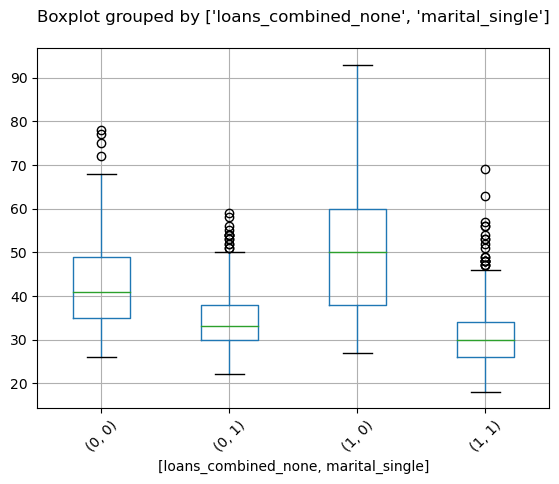

In [39]:
# Creating a box plot for the below features
df.boxplot(column='age', by=['loans_combined_none','marital_single'], rot=45)
plt.title("")
plt.show()

I am hypothesising that loans_combined_none and marital_single together may give an idea of someones age. My thinking here is that knowing whether someone has no loan along with whether they are single or not will be a good predictor. I would expect the average single person to be younger and combining this with loans info someone with no loans who is married or divorced I would expect to be older. Looking at the boxplot above we see varying medians among all the groups which means these medians could give us a good value to impute for the missing values depending on the observations status for these two variables.

In [40]:
#Creating a pivot table
ptable = df.pivot_table(values='age', 
                        index='loans_combined_none',
                        columns='marital_single',  
                        aggfunc='median')
ptable

marital_single,0,1
loans_combined_none,,
0,41.0,33.0
1,50.0,30.0


In [41]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['loans_combined_housing'], x['marital_single']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

I fill in the missing values based on the results seen in the pivot table above.

In [42]:
# Rescaling using 'RobustScaler'
robust_scaler = RobustScaler()
df[['age',
    'balance', 'duration', 'campaign', 'pdays', 'previous']] = robust_scaler.fit_transform(df[['age',
    'balance', 'duration', 'campaign', 'pdays', 'previous']])

From the boxplots in the EDA I carried out we could see that there were outliers present in the 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
To deal with this I applied the robust scaler operation which transforms the values in each column by subtracting the median from it and then dividing by the interquartile range. In some cases extreme outliers can be removed from datasets, we have some such cases here such as in the balance but as these results are practically possible I decided to keep them.

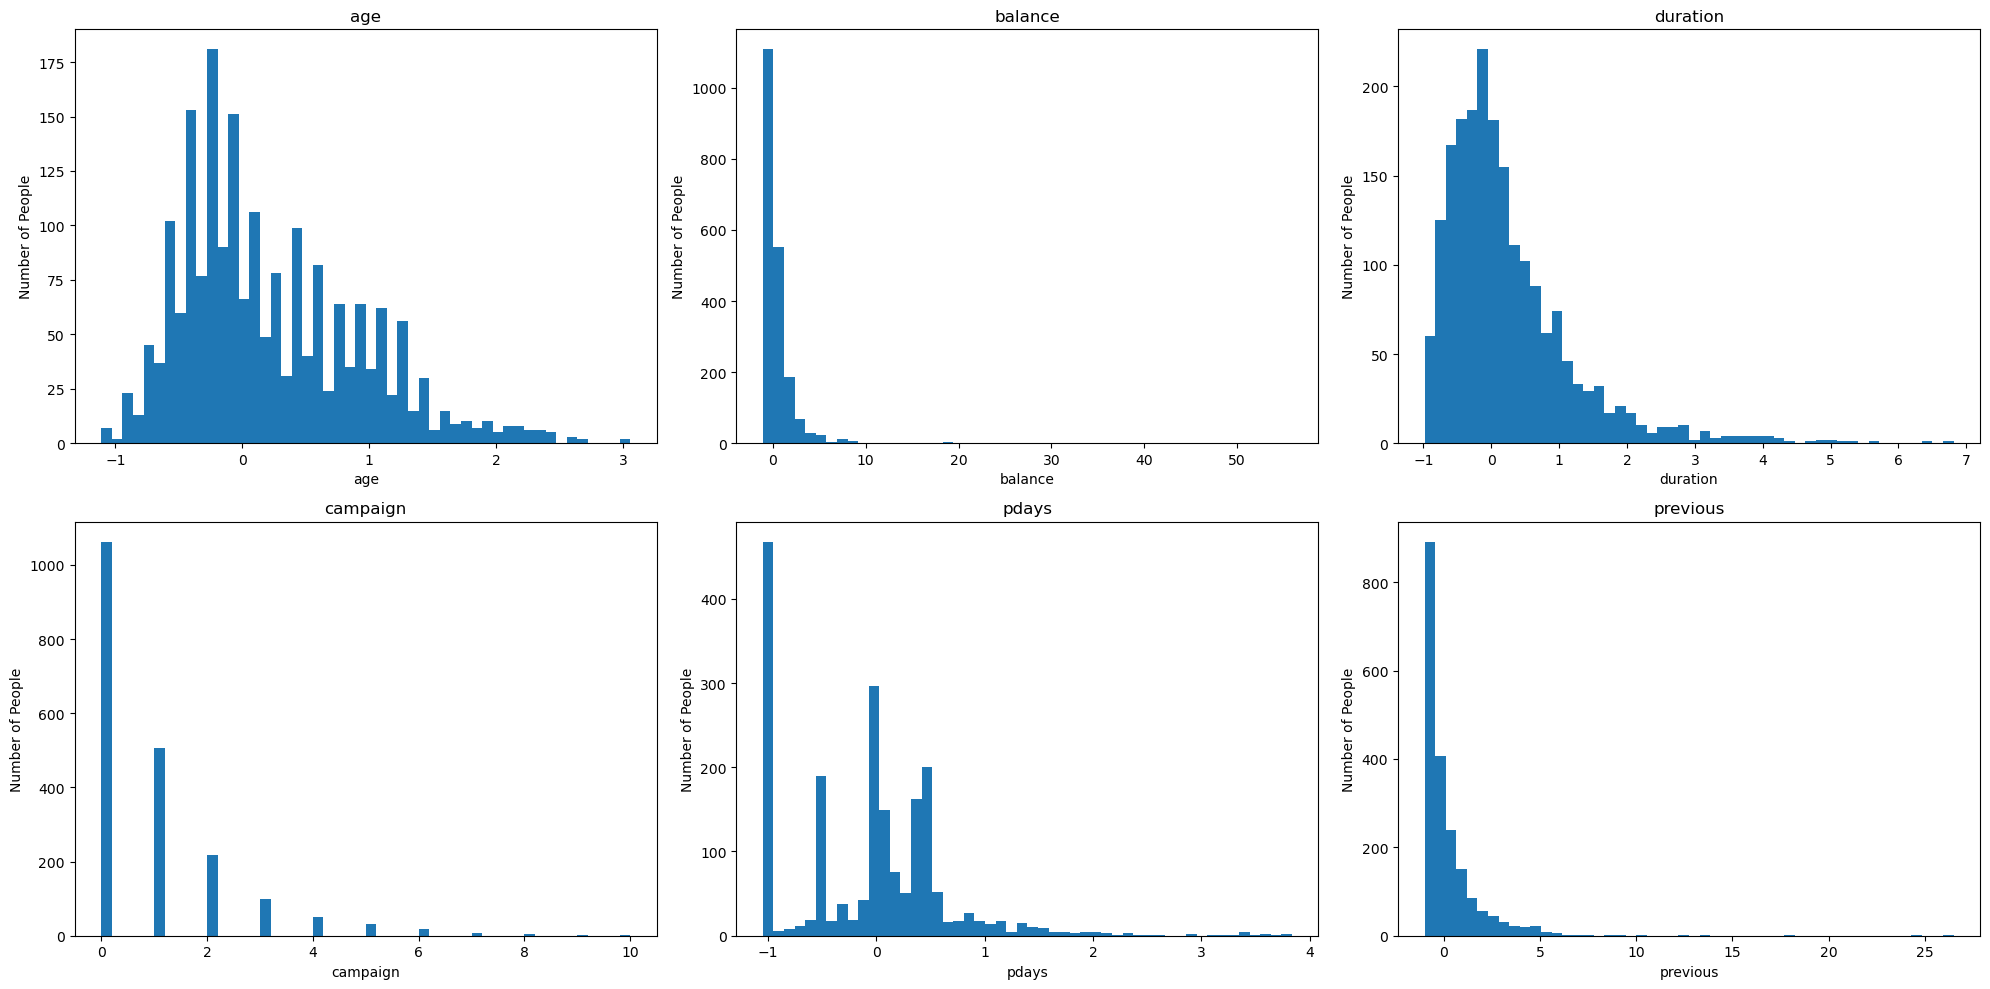

In [43]:
# In a similar way as was done in the EDA I create histograms, without the hue this time
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
fig, x = plt.subplots(2, 3, figsize=(20, 10))  # Adjust the figsize as needed

x = x.flatten()
for i, col in enumerate(numerical_cols):
    x[i].hist(df[col], bins=50)  # Plot histogram
    x[i].set_title(col)
    x[i].set_xlabel(col) 
    x[i].set_ylabel('Number of People')
plt.tight_layout() 
plt.show()     

I look at the data above again to see what is skewed and will need to be treated.

In [44]:
#Find the minimum value for each after the rescaling
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
campaign    0.000000
pdays      -1.044223
previous   -1.000000
dtype: float64

Next I am handling the skewness seen above in the graphs by performing log transforms. Some of the variables such as balance and duration are ideal candidates for log transform due to the right-skewedness and the tails they exhibit. I will also perform this on the others to attempt to reduce the skewness. We have negative values which means we will have to shift the data before performing the log transform as I have done below.

In [45]:
# Use a log transformation to decrease the impact of outliers
df['age'] = np.log(df['age'] + abs(min(df['age'])) + 1)
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)
df['duration'] = np.log(df['duration'] + abs(min(df['duration'])) + 1)
df['pdays'] = np.log(df['pdays'] + abs(min(df['pdays'])) + 1)
df['previous'] = np.log(df['previous'] + abs(min(df['previous'])) + 1)
df['campaign'] = np.log(df['campaign'] + abs(min(df['campaign'])) + 1)

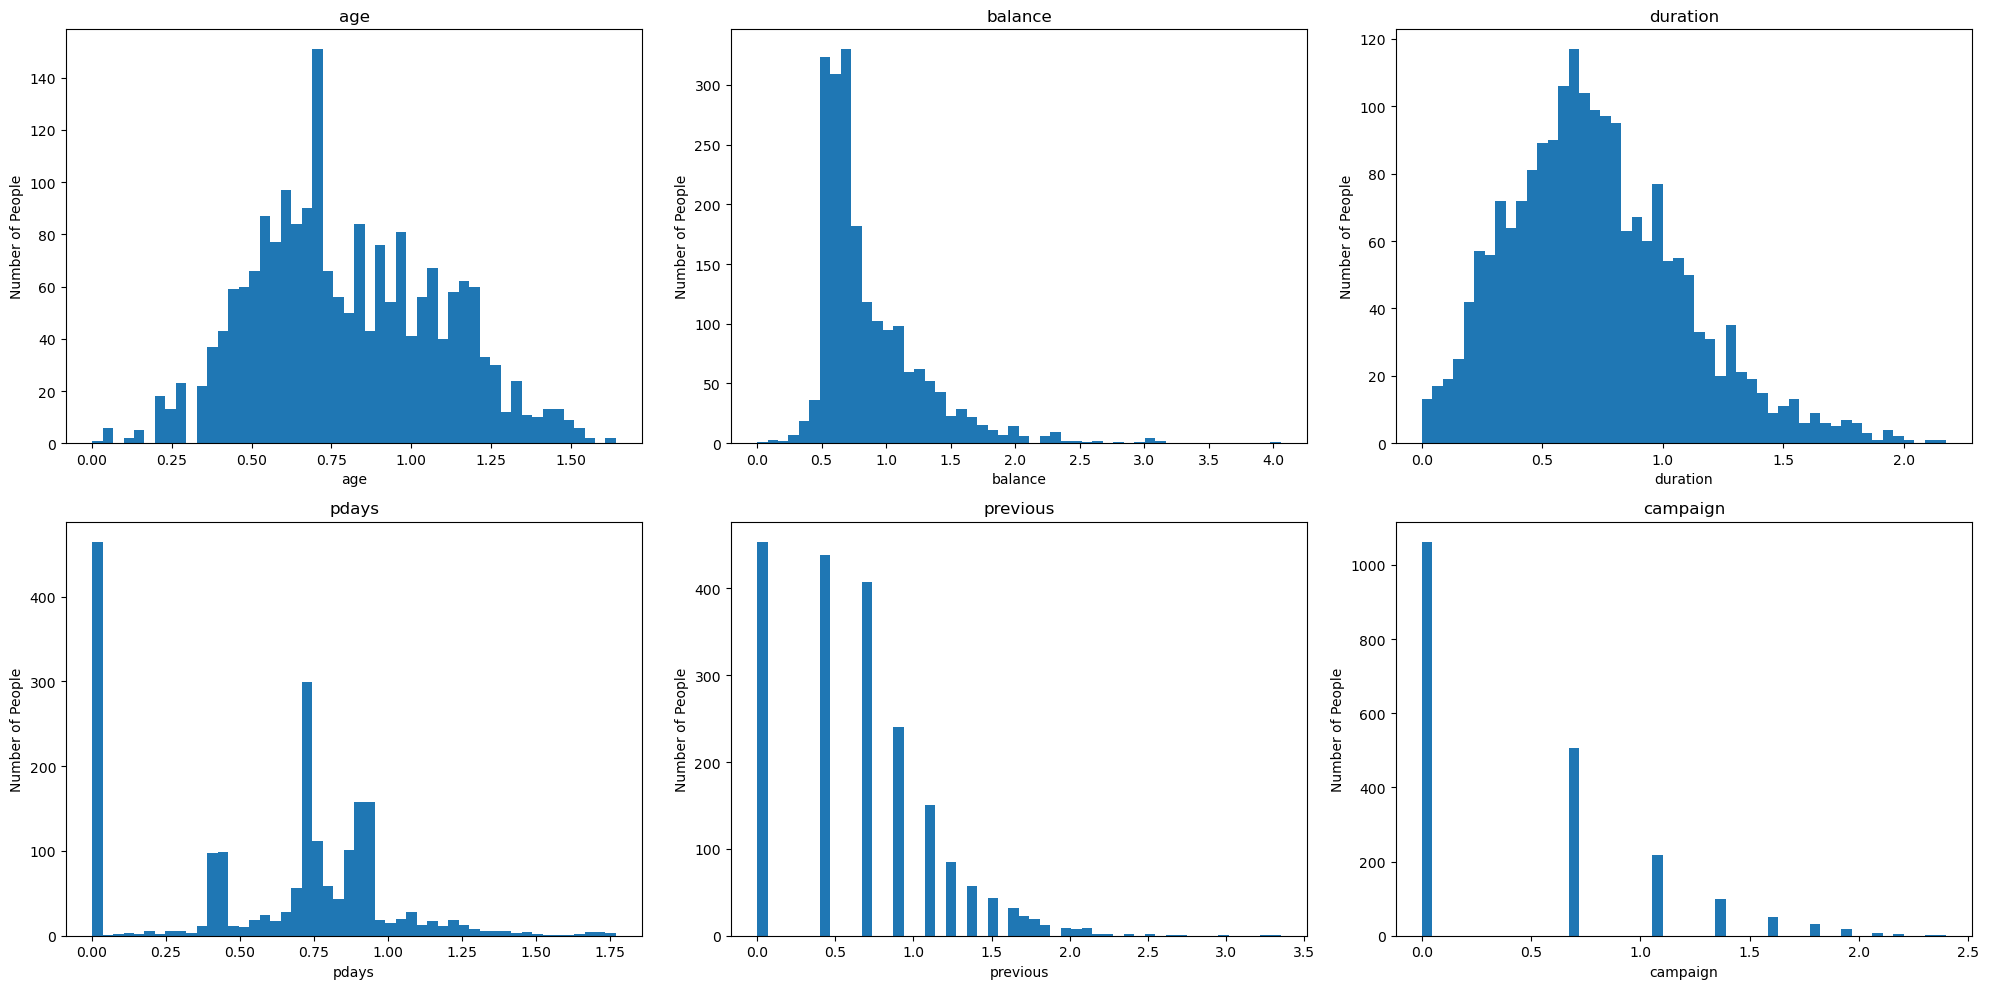

In [46]:
numerical_cols2 = ['age', 'balance','duration', 'pdays', 'previous', 'campaign']
# Again creating a subplot of histograms to analyse the effect on the transformed columns
fig, x = plt.subplots(2, 3, figsize=(20, 10))

x = x.flatten()
for i, col in enumerate(numerical_cols2):
    x[i].hist(df[col], bins=50) 
    x[i].set_title(col) 
    x[i].set_xlabel(col) 
    x[i].set_ylabel('Number of People')
plt.tight_layout() 
plt.show()     

While not perfect we can see a big improvement in the distribution of the variables above. 'Age' and 'duration' have noticeably more normal looking distributions. There is also improvement seen in the distribution of 'balance' and 'pdays' while we have succedded in slighly reducing the skewness of 'previous' and 'campaign'.

### Cyclical Variables

In [47]:
# Creating a dictionary assigning each month its max number of days
month_to_days = {1: 31, 2: 28, 3: 31, 4: 30, 5: 31, 6: 30, 7: 31, 8: 31, 9: 30, 10: 31, 11: 30, 12: 31}

# Calculate the sin and cos for day
df['sin_day'] = np.sin(2 * np.pi * df['day'] / df['month'].map(month_to_days))
df['cos_day'] = np.cos(2 * np.pi * df['day'] / df['month'].map(month_to_days))


# For the month 
df['sin_month'] = np.sin(2 * np.pi * df['month']/12)
df['cos_month'] = np.cos(2 * np.pi * df['month']/12)
# Drop the day and month columns
df = df.drop(['day', 'month'], axis=1)

In [48]:
df.head(5)

,age,education,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,marital_single,default_yes,subscribed_yes,loans_combined_housing,loans_combined_none,loans_combined_personal,sin_day,cos_day,sin_month,cos_month
0,0.575364,3.0,0.668238,1.624770,0.693147,0.561448,0.693147,0,0,0,...,1,0,0,1,0,0,0.207912,0.978148,0.866025,-0.5
1,0.773190,2.0,0.768220,0.678012,0.693147,0.567936,0.405465,0,0,0,...,0,0,0,0,0,0,0.207912,0.978148,0.866025,-0.5
2,1.187166,2.0,0.873966,0.412593,0.693147,0.862667,0.405465,0,0,0,...,0,0,0,0,0,0,0.207912,0.978148,0.866025,-0.5
3,0.959776,2.0,0.670367,0.763570,0.000000,0.860256,0.693147,1,0,0,...,0,0,0,0,0,0,0.207912,0.978148,0.866025,-0.5
4,1.098612,2.0,0.864961,1.107159,0.000000,1.014321,0.405465,0,0,0,...,0,0,0,1,0,0,0.207912,0.978148,0.866025,-0.5


Due to the cyclical nature of both days and month I dealth with these as above. This transformation maps the cyclical variables to the cordinates of a circle. This means that inputs like the month of December and January will now be beside each other which accurately reflects their relationship. As the number of days in each month varies I assigned the relevant divisor for each month to ensure accuracy. I then dropped the day and month column as these are no longer needed.

## Save the Prepared Dataset

In [49]:
df.to_csv('loans_train_prepared.csv')